In [ ]:
#WHAT TO DO?
# MNIST database - get the data, preprocess it to be a dataframe of value in each pixel
# apply different clustering algorithms to get the same results
# using sklearn!!!

In [37]:
import pandas as pd
from keras.datasets import mnist
import numpy as np
import datetime
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn_extra.cluster import KMedoids, CLARA
from matplotlib.colors import ListedColormap
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

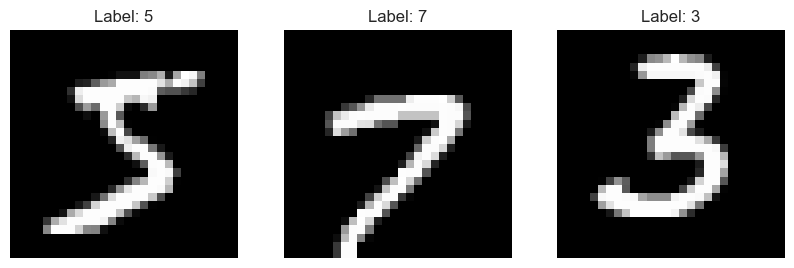

In [74]:
indices_to_plot = [0, 123, 52375]

# Plot the selected digits
plt.figure(figsize=(10, 5))
for i, index in enumerate(indices_to_plot, 1):
    plt.subplot(1, len(indices_to_plot), i)
    plt.imshow(train_images[index], cmap='gray')
    plt.title(f"Label: {train_labels[index]}")
    plt.axis('off')

plt.show()

In [3]:
train_images_flat = train_images.reshape((train_images.shape[0], -1))

# Create Pandas DataFrames for training and testing
columns = [f'pixel_{i}' for i in range(train_images_flat.shape[1])]
mnist_df = pd.DataFrame(train_images_flat, columns=columns)

# Add labels to the DataFrames
mnist_df['label'] = train_labels
mnist_clustering_data = mnist_df.drop(columns=['label'])

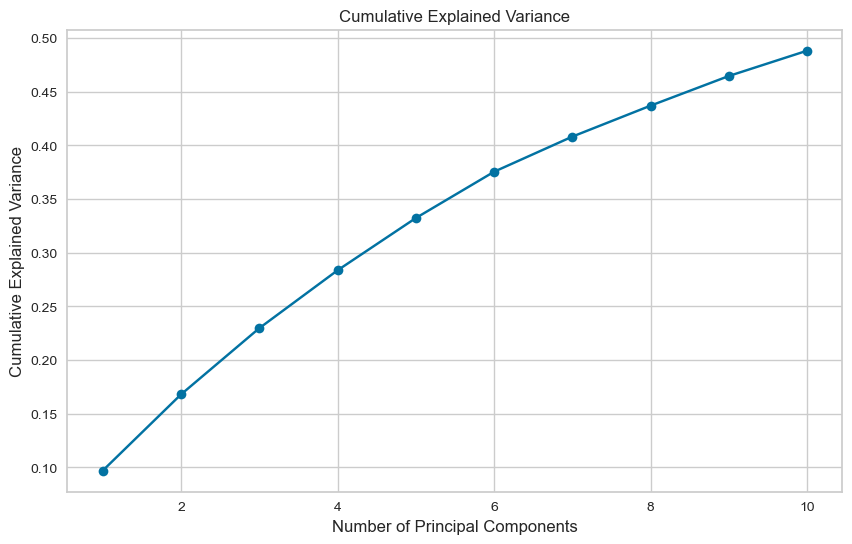

In [36]:
pca = PCA(n_components=10)
reduced_features = pca.fit_transform(mnist_clustering_data)

# Add reduced features to the DataFrame
mnist_df['PCA1'] = reduced_features[:, 0]
mnist_df['PCA2'] = reduced_features[:, 1]

# Explained variance for each principal component
explained_variance = pca.explained_variance_

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plotting explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [5]:
#K-Means
KM = KMeans(n_clusters=10)
mnist_df['cluster_km'] = KM.fit_predict(mnist_clustering_data)

c:\Users\jsmig\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
#K-Medoids
PAM = KMedoids(n_clusters=10)
mnist_df['cluster_pam'] = PAM.fit_predict(mnist_clustering_data)

In [65]:
#CLARA
CLARA = CLARA(n_clusters=10)
mnist_df['cluster_clara'] = CLARA.fit_predict(mnist_clustering_data)

In [8]:
#Agglomerative Hierarchial Clustering
AHC = AgglomerativeClustering(n_clusters=10)
mnist_df['cluster_ahc'] = AHC.fit_predict(mnist_clustering_data)

In [10]:
mnist_df.to_csv('clustering_db.csv',index=False)

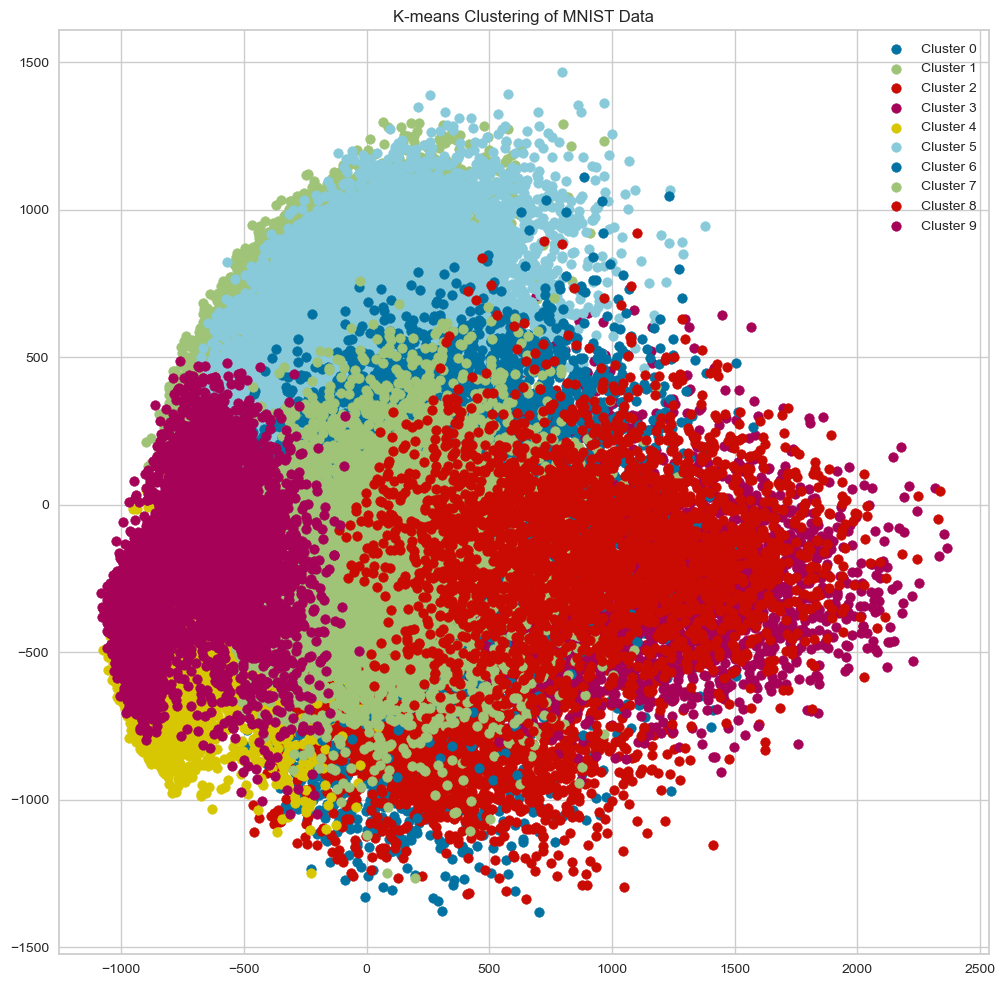

In [25]:
plt.figure(figsize=(12, 12))
for cluster in range(10):
    cluster_data = mnist_df[mnist_df['cluster_km'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('K-means Clustering of MNIST Data')
plt.legend()
plt.show()

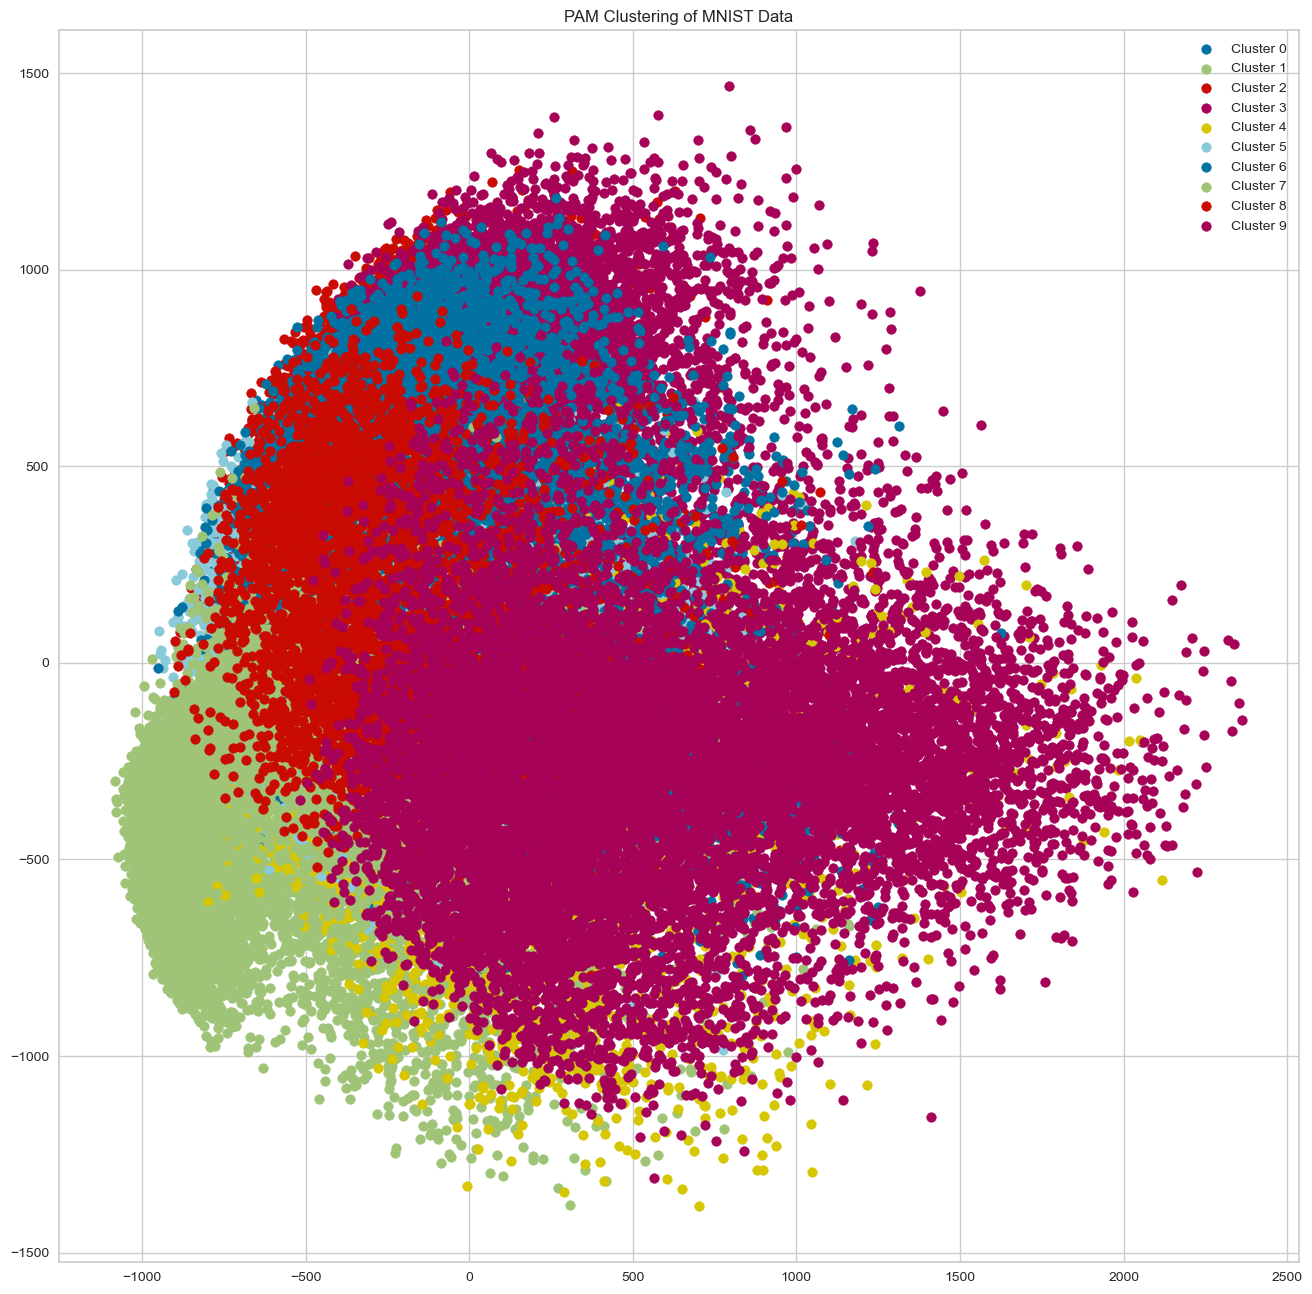

In [24]:
plt.figure(figsize=(16, 16))
for cluster in range(10):
    cluster_data = mnist_df[mnist_df['cluster_pam'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('PAM Clustering of MNIST Data')
plt.legend()
plt.show()

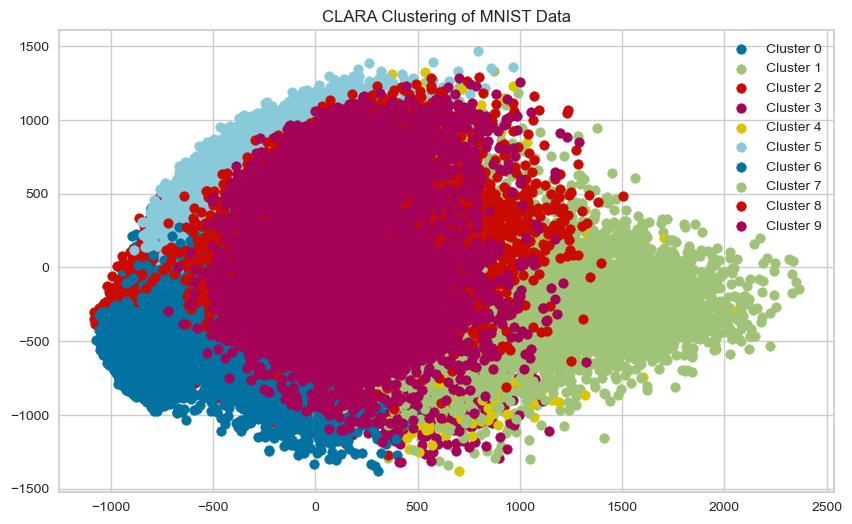

In [15]:
plt.figure(figsize=(10, 6))
for cluster in range(10):
    cluster_data = mnist_df[mnist_df['cluster_clara'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('CLARA Clustering of MNIST Data')
plt.legend()
plt.show()

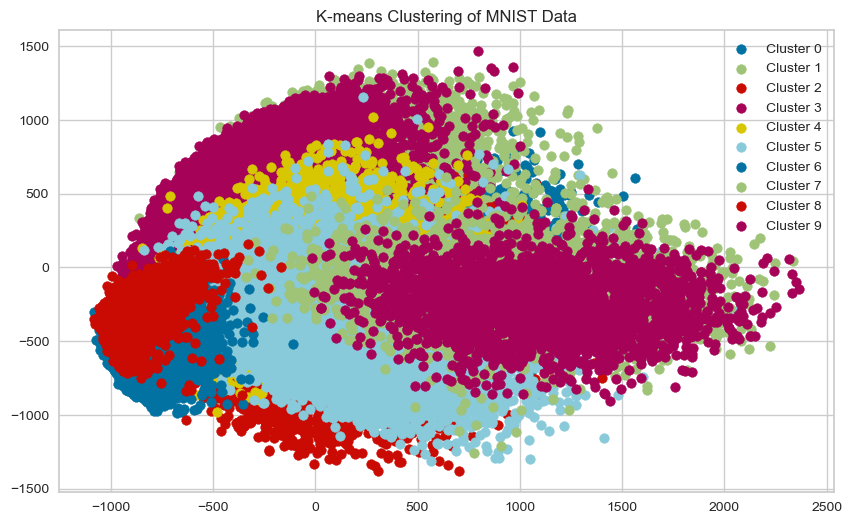

In [16]:
plt.figure(figsize=(10, 6))
for cluster in range(10):
    cluster_data = mnist_df[mnist_df['cluster_ahc'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('AHC Clustering of MNIST Data')
plt.legend()
plt.show()

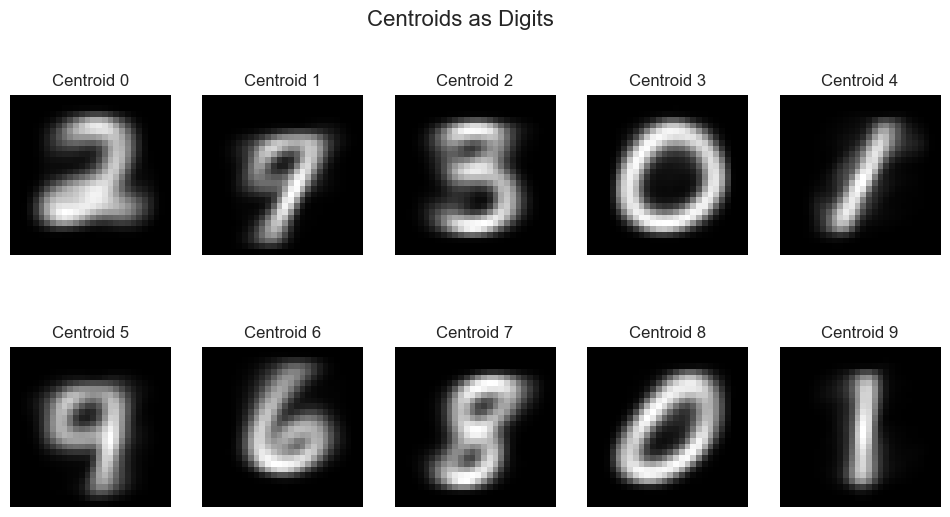

In [29]:
centroids=KM.cluster_centers_
centroid_images = centroids.reshape((10, 28, 28))

# Visualize the centroids as digits
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images[i], cmap='gray')
    plt.title(f'Centroid {i}')
    plt.axis('off')

plt.suptitle('Centroids as Digits', fontsize=16)
plt.show()


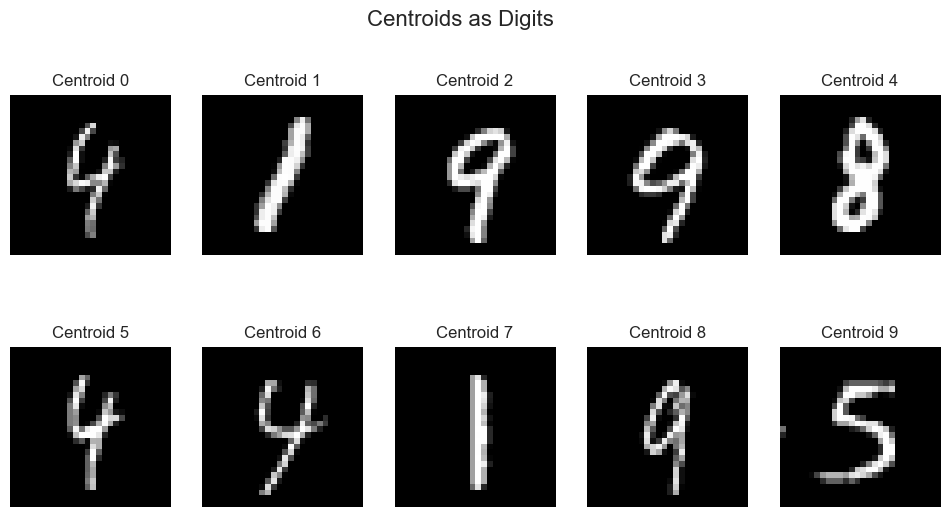

In [30]:
centroids1=PAM.cluster_centers_
centroid_images1 = centroids1.reshape((10, 28, 28))

# Visualize the centroids as digits
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroid_images1[i], cmap='gray')
    plt.title(f'Centroid {i}')
    plt.axis('off')

plt.suptitle('Centroids as Digits', fontsize=16)
plt.show()

In [34]:
inertia = KM.inertia_
silhouette_km = silhouette_score(mnist_clustering_data, mnist_df['cluster_km'])
silhouette_pam = silhouette_score(mnist_clustering_data, mnist_df['cluster_pam'])
silhouette_clara = silhouette_score(mnist_clustering_data, mnist_df['cluster_clara'])
silhouette_ahc = silhouette_score(mnist_clustering_data, mnist_df['cluster_ahc'])

KMeans : 0.05842608565634314 /n PAM : 0.014143669794226578 /n CLARA : 0.03954850153774506 /n AHC : 0.02409487273928228 /n


In [35]:
print(f'KMeans : {silhouette_km}  PAM : {silhouette_pam}  CLARA : {silhouette_clara}  AHC : {silhouette_ahc} ')

KMeans : 0.05842608565634314  PAM : 0.014143669794226578  CLARA : 0.03954850153774506  AHC : 0.02409487273928228 


In [75]:
colors=['#00FFFF','#0000FF','#FFD700','#FF4500','#FF0000','#15B01A','#DA70D6','#FFFF14','#3D1C02','#D1B26F']

In [46]:
#using t-SNE
tsne = TSNE(n_components = 2)
data_tsne = tsne.fit_transform(mnist_clustering_data)
tsne_mnist = pd.DataFrame(data=data_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_clustering_data = tsne_mnist.copy()
tsne_mnist = tsne_mnist.join(mnist_df['label'])

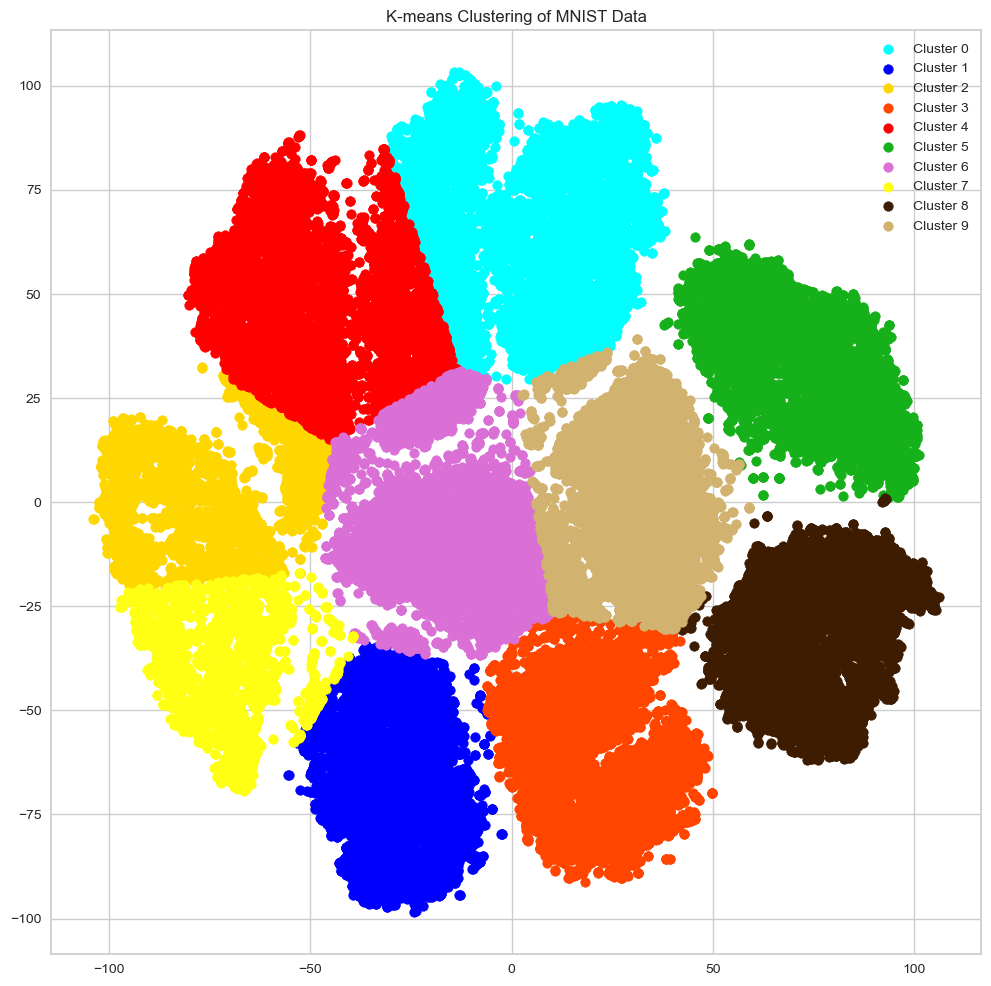

0.41930017
65250.91577661004


In [77]:
#K-Means with t-SNE
#tsne_mnist['cluster_km'] = KM.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_km'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('K-means Clustering of MNIST Data')
plt.legend()
plt.show()
silhouette_km_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_km'])
print(silhouette_km_tsne)
calinski_harabasz_km_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_km'])
print(calinski_harabasz_km_tsne)

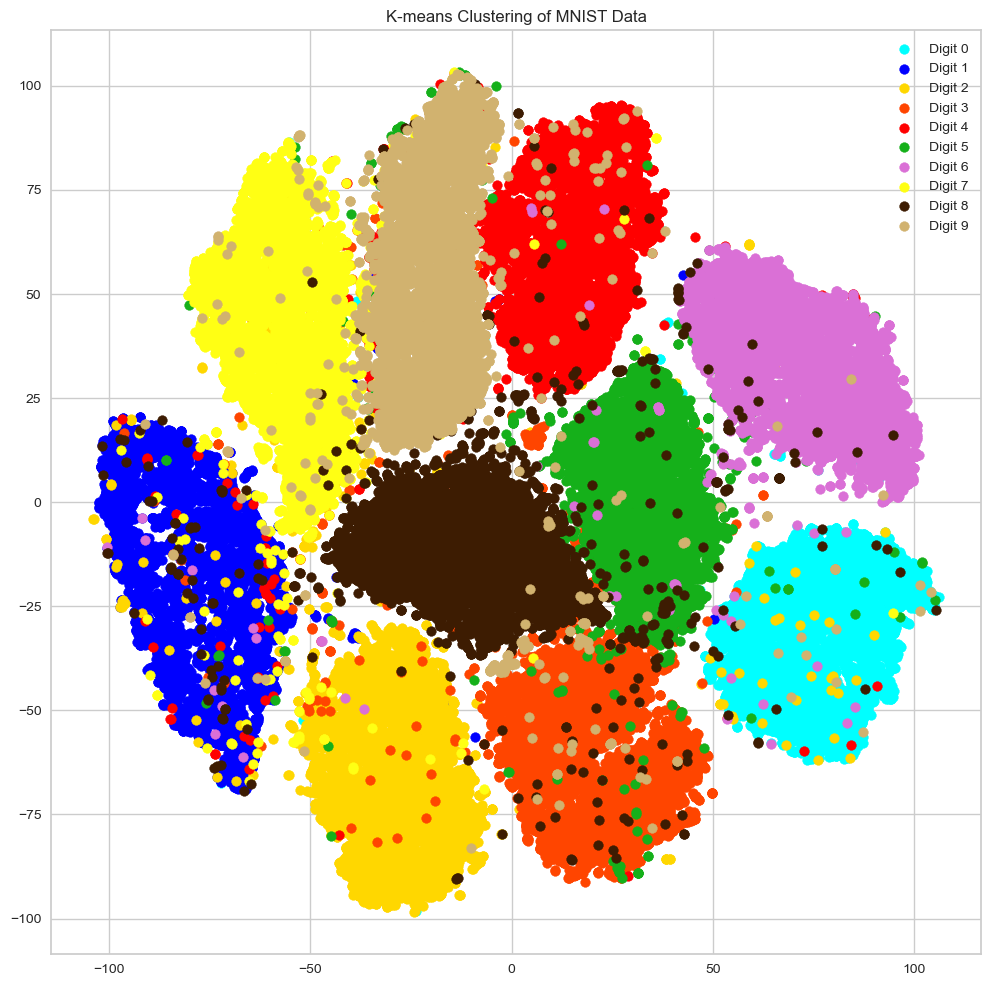

In [78]:
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['label'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Digit {cluster}',c=color)
plt.title('K-means Clustering of MNIST Data')
plt.legend()
plt.show()

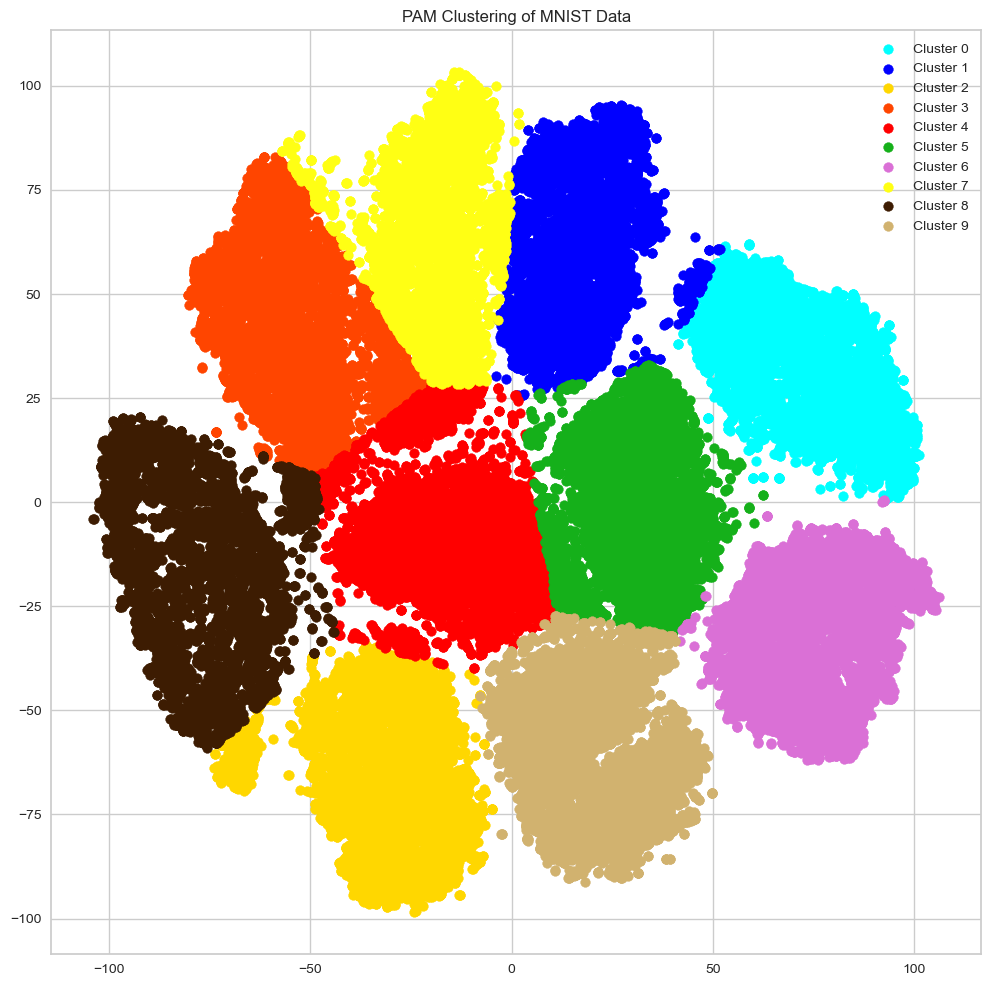

0.4146659
65092.186058965846


In [79]:
#K-Medoids
#tsne_mnist['cluster_pam'] = PAM.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_pam'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('PAM Clustering of MNIST Data')
plt.legend()
plt.show()
silhouette_pam_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_pam'])
print(silhouette_pam_tsne)
calinski_harabasz_pam_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_pam'])
print(calinski_harabasz_pam_tsne)

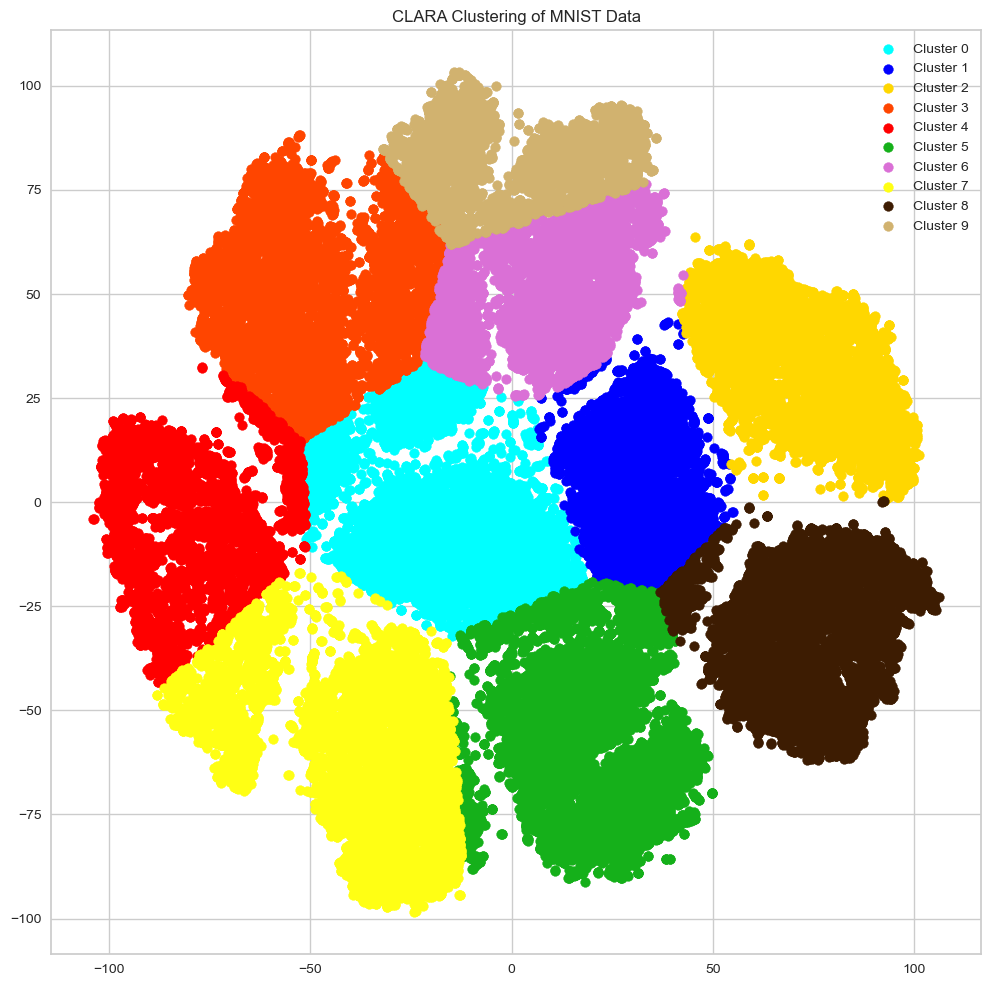

0.39360976
59751.54742978662


In [80]:
#CLARA
#tsne_mnist['cluster_clara'] = CLARA.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_clara'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('CLARA Clustering of MNIST Data')
plt.legend()
plt.show()
silhouette_clara_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_clara'])
print(silhouette_clara_tsne)
calinski_harabasz_clara_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_clara'])
print(calinski_harabasz_clara_tsne)

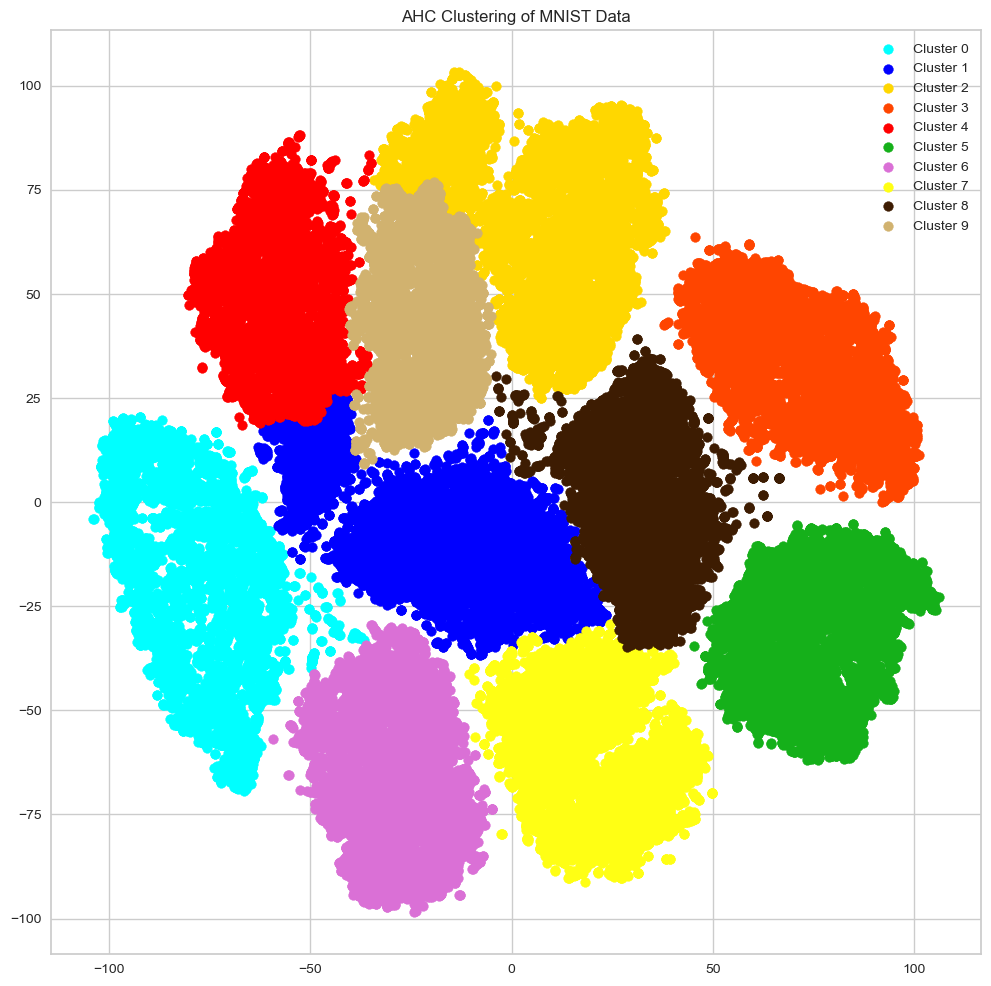

0.4022003
60738.39415796215


In [81]:
#Agglomerative Hierarchial Clustering
#tsne_mnist['cluster_ahc'] = AHC.fit_predict(tsne_clustering_data)
plt.figure(figsize=(12, 12))
for cluster, color in zip(range(10),colors):
    cluster_data = tsne_mnist[tsne_mnist['cluster_ahc'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}',c=color)
plt.title('AHC Clustering of MNIST Data')
plt.legend()
plt.show()
silhouette_ahc_tsne = silhouette_score(tsne_clustering_data, tsne_mnist['cluster_ahc'])
print(silhouette_ahc_tsne)
calinski_harabasz_ahc_tsne = calinski_harabasz_score(tsne_clustering_data, tsne_mnist['cluster_ahc'])
print(calinski_harabasz_ahc_tsne)